# Tout sur la POO, les builtins, les operateurs

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import total_ordering
from datetime import datetime
from pathlib import Path
import math

## 1. Jetons un coup d'oeil à list et np.ndarray

In [2]:
villes = [ 'Toulouse', 'Pau', 'Bordeaux']
temperatures = np.random.normal(12, 2, 10000)

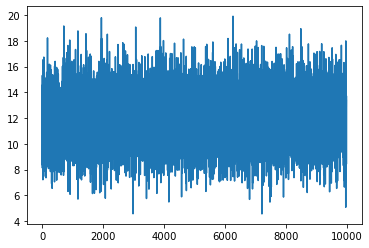

In [3]:
plt.plot(temperatures)

In [4]:
# access doc from plt.plot
# plt.plot?

In [5]:
# builtin function len
# => attends methode __len__ dans les classes list et np.ndarray
print(len(villes))
print(len(temperatures))
# derriere le décors
print(villes.__len__())
print(temperatures.__len__())

3
10000
3
10000


In [6]:
# operator +
print(list.__add__)
villes + ['Paris']

<slot wrapper '__add__' of 'list' objects>


['Toulouse', 'Pau', 'Bordeaux', 'Paris']

In [7]:
# methode __add__ de np.ndarray
temperatures + temperatures

array([24.84443905, 26.29909247, 26.021487  , ..., 25.15031013,
       21.61136198, 27.32988964])

In [8]:
# methode __add__ de np.ndarray
temperatures + 1

array([13.42221952, 14.14954623, 14.0107435 , ..., 13.57515507,
       11.80568099, 14.66494482])

In [9]:
# methode __add__ du type int: NotImplemented
# methode __radd__ du type ndarray
1 + temperatures

array([13.42221952, 14.14954623, 14.0107435 , ..., 13.57515507,
       11.80568099, 14.66494482])

In [10]:
# both types: NotImplemented
# "Toulouse" < 3
# TypeError: '<' not supported between instances of 'str' and 'int'

In [11]:
temperatures[temperatures >= 10]

array([12.42221952, 13.14954623, 13.0107435 , ..., 12.57515507,
       10.80568099, 13.66494482])

In [12]:
# possible car ndarray est iterable, + est defini sur ses elements, 0 est neutre pour +
sum(temperatures)

119955.73362402037

In [13]:
# valeur neutre 0 est OK pour l'addition de ndarray
sum([temperatures, temperatures, temperatures])

array([37.26665857, 39.4486387 , 39.03223049, ..., 37.7254652 ,
       32.41704297, 40.99483446])

In [14]:
# valeur neutre [] est ok pour l'addition de list
sum([[1,2,3], [3,4,5]], [])

[1, 2, 3, 3, 4, 5]

In [15]:
# un iterable a une methode __iter__
it = iter(villes)
it2 = iter(it)
it is it2

True

In [17]:
# un iterator a une methode __next__
# iteration finished with exception StopIteration (si l'iteration est finie)
next(it)

'Pau'

In [18]:
# lazy evaluation de map
map(lambda x: x+1, temperatures)

In [19]:
sum(map(lambda x: x+1, temperatures))

129955.73362402021

In [20]:
# list comprehension, consume generator for into a list
[ t+1 for t in temperatures ]

[13.422219524175711,
 14.149546232754673,
 14.010743498327713,
 14.918787222903735,
 14.870485407006882,
 15.558905974129974,
 10.457783424714933,
 16.314492050133197,
 9.1164553321561,
 11.720424283448468,
 13.43401825187576,
 11.553840596297363,
 15.167028343378526,
 14.636304542939834,
 9.330612366863777,
 13.265296622662234,
 11.185473900794845,
 14.586410361490305,
 11.996375418510194,
 13.052503563303802,
 11.34614802934463,
 16.375641434686493,
 11.046372646795454,
 10.004250248113106,
 13.543717212312433,
 8.206677144368555,
 15.103788652785651,
 17.524198824998646,
 12.661343173849346,
 14.110444922390753,
 17.368052530199382,
 16.38351075298609,
 14.526365286537672,
 9.206478673280069,
 13.980244905156445,
 14.456632788189143,
 12.58773764661698,
 13.36406863917781,
 14.818590275690518,
 13.200007717029841,
 15.08912089070031,
 8.81333343358098,
 11.814472835522945,
 11.937016816699561,
 9.261073049337952,
 14.792594040765842,
 15.151850254860458,
 14.949734249912524,
 11.323

In [21]:
# expression for as a generator
g = (t+1 for t in temperatures)
g

<generator object <genexpr> at 0x00000211E87A13C0>

In [22]:
# un generator est iterator/iterable
next(g)

13.422219524175711

In [23]:
# map/reduce en mode pipeline
sum(t+1 for t in temperatures)

129955.73362402021

In [24]:
# map puis le reduce: pas bien
sum([t+1 for t in temperatures])

129955.73362402021

In [25]:
# generator with other parameters => (generator expr), param2
sum((t+1 for t in temperatures), 4)

129959.73362402021

In [26]:
def fibo_gen():
    a = 0
    b = 1
    yield a
    yield b
    while True:
        a, b = b, a + b
        yield b

In [27]:
g = fibo_gen()
g

<generator object fibo_gen at 0x00000211E87A1B30>

In [28]:
list(zip(range(10), fibo_gen()))

[(0, 0),
 (1, 1),
 (2, 1),
 (3, 2),
 (4, 3),
 (5, 5),
 (6, 8),
 (7, 13),
 (8, 21),
 (9, 34)]

In [29]:
for i,v in enumerate(villes):
    print(i,v)

0 Toulouse
1 Pau
2 Bordeaux


In [30]:
city_dict = {"name":"Toulouse", "cp": 31000 }

In [31]:
for k,v in city_dict.items():
    print(k,v)

name Toulouse
cp 31000


## 2. Poo

In [60]:
@total_ordering
class Point2D:
    # methode object: 1er parametre l'objet courant
    def __init__(self, name, x, y):
        self.name = name
        self.x = x
        self.y = y
        
    # override de __repr__ et __str__
    def __repr__(self):
        # old python: format % v1, v2, v3
        # return "{}({},{})".format(self.name, self.x, self.y)
        return f"{self.name}({self.x},{self.y})"
        
    # override default __eq__ based on memory address memory
    def __eq__(self, other):
        # choix de dev: isinstance, ...
        if type(other) != Point2D:
            return NotImplemented
        return (self.name, self.x, self.y) == (other.name, other.x, other.y)
    
    # ovverride default __lt__ (<) which returns NotImplemented
    def __lt__(self, other):
        if type(other) != Point2D:
            return NotImplemented
        return (self.x, self.y, self.name) < (other.x, other.y, other.name)
    
    # methode objet métier
    def distance(self, other):
        # check or not
        return math.hypot(self.x - other.x, self.y - other.y)
    
    # TODO: redefine also __hash__
    
    # variable de classe
    PI = 3.14
    
    @staticmethod
    def fromString(pointString):
        # TODO: parsing
        return Point2D(pointString[:1], 0, 0)
    
    # cls capture la classe courante
    @classmethod
    def fromString2(cls, pointString):
        # TODO: parsing
        return Point2D(pointString[:1], 0, 0)

In [61]:
print(Point2D.PI)
ptAA = Point2D.fromString("A(3,4)")
ptAAA = Point2D.fromString2("A(3,4)")
ptAA, ptAAA

3.14


(A(0,0), A(0,0))

In [62]:
# appelle __init__ de la classe
ptA = Point2D("A", 3, 4)
ptB = Point2D("B", 4, 2)
print(ptA.name)

A


In [63]:
# bad practice but interesting for instance for pandas
ptA.color = "Red"
ptA.color

'Red'

In [64]:
# appelle auto str => __str__
print(ptA)
# appelle auto repr => __repr__
ptA

A(3,4)


A(3,4)

In [65]:
print("un pt est un object", isinstance(ptA, object))
print("un pt est un Point2D", isinstance(ptA, Point2D))      

un pt est un object True
un pt est un Point2D True


In [66]:
# equals and order
print(ptA is ptA , ptA is not ptA)
print(ptA == ptA , ptA != ptA)
print(ptA == ptB , ptA != ptB)
print(ptA < ptB , ptA > ptB)
print(ptA <= ptB , ptA >= ptB)

True False
True False
False True
True False
True False


In [67]:
# sort with inner order
sorted([ptA, ptB])

[A(3,4), B(4,2)]

In [68]:
# sort with inner order reversed
sorted([ptA, ptB], reverse=True)

[B(4,2), A(3,4)]

In [73]:
# sort with external order (key extractor arg)
sorted([ptA, ptB, Point2D("C",0,0), Point2D("A",4,3)], key=lambda p: (p.name,p.x,p.y))

[A(3,4), A(4,3), B(4,2), C(0,0)]

In [74]:
# call business method, OO way
ptA.distance(ptB)

2.23606797749979

In [76]:
# call business method (OO) as a classic function
Point2D.distance(ptA, ptB)

2.23606797749979

In [77]:
class Point2Dbis:
    
    def __init__(self, name, x, y):
        self.name = name
        # x est une property
        self.x = x
        self.y = y
    
    @property
    def x(self):
        return self._x
    
    @x.setter
    def x(self, value):
        self._x = value
        
    # @x.deleter
    # def x(self):
    #    del self._x
        
ptAbis = Point2Dbis("A", 3, 4)
print(ptAbis.x)
ptAbis.x = 5
print(ptAbis.x)        

3
5


In [78]:
# classic attribute can be deleted
del ptA.x

In [79]:
# property without deleter can't be deleted
# del ptAbis.x
# AttributeError: can't delete attribute

In [80]:
# class WeightedPoint2D(Point2D, Class2, Class3, Class3):
class WeightedPoint2D(Point2D): 
    
    def __init__(self, name, x, y, weight):
        super().__init__(name, x, y)
        self.weight = weight

wpE = WeightedPoint2D("E", 3, 4, 12.3)
wpE


E(3,4)

In [81]:
print(type(wpE))
print(isinstance(wpE, Point2D))
print(isinstance(wpE, WeightedPoint2D))

<class '__main__.WeightedPoint2D'>
True
True


## 3. With

In [82]:
with open('data/05-station-meteo-piscine-nakache.csv') as f:
    # read content as list of lines
    data = list(f)
    # implicit/finally: f.close()
# post treatment
data

['data;id;humidite;direction_du_vecteur_de_vent_max;pluie_intensite_max;pression;direction_du_vecteur_vent_moyen;type_de_station;pluie;direction_du_vecteur_de_rafale_de_vent_max;force_moyenne_du_vecteur_vent;force_rafale_max;temperature;heure_de_paris;heure_utc\n',
 '0b2603d00a2804b06dc02800;5;69;0;0;101000;150;ISS;0;0.0;3;10;14.2;2019-09-06T09:15:00+02:00;2019-09-06T07:15:00+00:00\n',
 '0b26045095d804d06ddc3400;5;59;14;0;101000;154;ISS;0;315.0;3;13;16.5;2019-09-06T10:15:00+02:00;2019-09-06T08:15:00+00:00\n',
 '0b2605d1c5100580ada05400;5;34;0;0;100900;176;ISS;0;0.0;5;21;21.1;2019-09-06T13:15:00+02:00;2019-09-06T11:15:00+00:00\n',
 '0b260611c9180530adbe3800;5;35;15;0;100900;166;ISS;0;337.5;5;14;21.2;2019-09-06T13:45:00+02:00;2019-09-06T11:45:00+00:00\n',
 '0b26073219080580ed9e5800;5;33;15;0;100800;176;ISS;0;337.5;7;22;22.6;2019-09-06T16:00:00+02:00;2019-09-06T14:00:00+00:00\n',
 '0b26085225080500cd7e4c00;5;33;15;0;100700;160;ISS;0;337.5;6;19;22.9;2019-09-06T18:15:00+02:00;2019-09-06T16:

In [83]:
meteo = pd.read_csv('data/05-station-meteo-piscine-nakache.csv', delimiter=';')
meteo

,data,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,type_de_station,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature,heure_de_paris,heure_utc
0,0b2603d00a2804b06dc02800,5,69,0,0,101000,150,ISS,0,0.0,3,10,14.2,2019-09-06T09:15:00+02:00,2019-09-06T07:15:00+00:00
1,0b26045095d804d06ddc3400,5,59,14,0,101000,154,ISS,0,315.0,3,13,16.5,2019-09-06T10:15:00+02:00,2019-09-06T08:15:00+00:00
2,0b2605d1c5100580ada05400,5,34,0,0,100900,176,ISS,0,0.0,5,21,21.1,2019-09-06T13:15:00+02:00,2019-09-06T11:15:00+00:00
3,0b260611c9180530adbe3800,5,35,15,0,100900,166,ISS,0,337.5,5,14,21.2,2019-09-06T13:45:00+02:00,2019-09-06T11:45:00+00:00
4,0b26073219080580ed9e5800,5,33,15,0,100800,176,ISS,0,337.5,7,22,22.6,2019-09-06T16:00:00+02:00,2019-09-06T14:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24921,0a66140e568800016bbc6c00,5,81,14,0,99300,0,ISS,0,315.0,11,27,7.5,2020-03-06T08:45:00+01:00,2020-03-06T07:45:00+00:00
24922,0a66142e4e9000016bbc7800,5,82,14,0,99300,0,ISS,0,315.0,11,30,7.3,2020-03-06T09:00:00+01:00,2020-03-06T08:00:00+00:00
24923,0a66144e469000016bdc7800,5,82,14,0,99400,0,ISS,0,315.0,11,30,7.1,2020-03-06T09:15:00+01:00,2020-03-06T08:15:00+00:00
24924,0a66146e469800010bdc5840,5,83,14,0,99400,0,ISS,0,315.0,8,22,7.1,2020-03-06T09:30:00+01:00,2020-03-06T08:30:00+00:00


In [84]:
meteo[meteo.humidite>50]

,data,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,type_de_station,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature,heure_de_paris,heure_utc
0,0b2603d00a2804b06dc02800,5,69,0,0,101000,150,ISS,0,0.0,3,10,14.2,2019-09-06T09:15:00+02:00,2019-09-06T07:15:00+00:00
1,0b26045095d804d06ddc3400,5,59,14,0,101000,154,ISS,0,315.0,3,13,16.5,2019-09-06T10:15:00+02:00,2019-09-06T08:15:00+00:00
9,0b260bb065c000002db01400,5,56,8,0,100900,0,ISS,0,180.0,1,5,15.9,2019-09-07T01:00:00+02:00,2019-09-06T23:00:00+00:00
13,0b260b70a1a000004db60c00,5,52,11,0,100900,0,ISS,0,247.5,2,3,16.8,2019-09-07T00:30:00+02:00,2019-09-06T22:30:00+00:00
14,0b2700501de800004db01400,5,61,8,0,100900,0,ISS,0,180.0,2,5,14.7,2019-09-07T02:15:00+02:00,2019-09-07T00:15:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24921,0a66140e568800016bbc6c00,5,81,14,0,99300,0,ISS,0,315.0,11,27,7.5,2020-03-06T08:45:00+01:00,2020-03-06T07:45:00+00:00
24922,0a66142e4e9000016bbc7800,5,82,14,0,99300,0,ISS,0,315.0,11,30,7.3,2020-03-06T09:00:00+01:00,2020-03-06T08:00:00+00:00
24923,0a66144e469000016bdc7800,5,82,14,0,99400,0,ISS,0,315.0,11,30,7.1,2020-03-06T09:15:00+01:00,2020-03-06T08:15:00+00:00
24924,0a66146e469800010bdc5840,5,83,14,0,99400,0,ISS,0,315.0,8,22,7.1,2020-03-06T09:30:00+01:00,2020-03-06T08:30:00+00:00


In [85]:
# a function with a lot of default args (all named)
# pd.read_csv?

## 4. Path
- pathlib.Path (modern object) vs os.path (old str)
    - joinpath, rename, unlink, exists, isXXX, stat, mkdir, glob, ...
- NB: relative tools: shutil (copy), sys (argv, ...)

In [87]:
myDir = Path('.')

In [96]:
for f in myDir.glob('**/*.py'):
    statFile = f.stat()
    print(f, statFile.st_size, datetime.fromtimestamp(statFile.st_mtime), sep=' -> ')

manip.py -> 492 -> 2020-12-11 11:22:47.869233
mycsv.py -> 85 -> 2020-12-11 10:44:49.311377
tchatbot.py -> 219 -> 2020-12-11 10:25:14.120877
tchat\common.py -> 43 -> 2020-12-11 11:13:05.888301
tchat\__init__.py -> 109 -> 2020-12-11 11:21:14.291313
tchat\training\dataset.py -> 67 -> 2020-12-11 10:59:05.140801
tchat\training\train.py -> 208 -> 2020-12-11 11:14:38.800451
tchat\training\__init__.py -> 88 -> 2020-12-11 11:03:13.669721


In [97]:
imgDir = myDir.joinpath('Images', 'Montagne', 'Ayous')

In [100]:
imgDir.exists()

False

In [102]:
imgDir.mkdir(parents=True, exist_ok=True)

In [103]:
imgDir.exists()

True

## 5. Function arguments

In [104]:
# *args: liste de parametres par position (homogene)
# **kwargs : dictionnaire des paramètres variables par keyword (heterogene)
def f(a,b,*args, d=3, e=None, **kwargs):
    """ here some good documentation
    """
    pass

In [105]:
# access docstring of my function
# f?

In [106]:
# examples of calls
f(3,4,"Pau","Toulouse")
f(3,4,"Pau", e=15)
f(3,4,"Pau", e=15, toto="RRR")
f(a=3, b=5)

In [109]:
# call with unpacking
# - first element of villes is assigned to arg b
# - others are assigned to positional varargs args as a list 
# - value with key e from dict is assigned to keyword arg e
# - others key/value from dict are assigned to kwargs as a dict without key e
city_dict['e'] = "oh oh"
f(3, *villes, **city_dict)

## 6. Multi threading
https://docs.python.org/3/library/concurrent.futures.html#module-concurrent.futures

## 7. API Rest
 - django
 - flask
 - fastapi : https://fastapi.tiangolo.com/

## 8. Functional/Meta Programming
- Functional Programming Modules: itertools, functools, operators
- abstract class/interface: module abc

## 9. Time and world travel in Python
- from module datetime: datetime, date, time, timedelta + methods parse/format: strptime/strftime
    - include or not TZ info
- external module pytz to deal with TZ as str (Europe/Paris)
- external package dateutil to count months, years (dateutil.relativedelta)
- module locale: getlocale, setlocale, ...
- external module babel to deal with internationalization